# Assignment 1.2: Polynomial Model

* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*

**Miller Ridgeway**

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

In [118]:
def polynomial_model(X,W):
    result = []
    for entry in X:
        powers = np.arange(W.shape[0])
        samples_unraised = np.repeat(entry, W.shape[0])
        poly_coef = np.power(samples_unraised, powers)
        final_weight = poly_coef @ W
        result.append(final_weight)
    return np.array(result)

Now implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}] \;(-2)\; (T - Y)$$

* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

In [99]:
def dYdW(X, T, W): #[1, X, X^2..X^p-1]
    powers = np.array(range(W.shape[0]))
    xs = np.power(X, powers)
    return xs #np.hstack((X**0, X**1, X**2, X**3, X**4))

def dEdY(X, T, W):
    Y = polynomial_model(X, W)
    return -2 * (T - Y)
    
def polynomial_gradient(X, T, W): #Otherwise known as dEdW
    result = dEdY(X, T, W).T @ dYdW(X, T, W) / (X.shape[0])
    return result.T

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

## Simple Test of your Code

Let's copy and paste two of the functions used in lecture for use here.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [73]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean((T - model(X, W))**2))

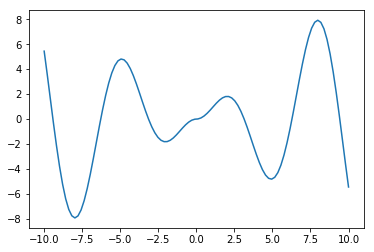

In [74]:
X = np.linspace(-10, 10, 100).reshape(-1, 1)
T = np.sin(X) * np.abs(X)
plt.plot(X, T);

In [75]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

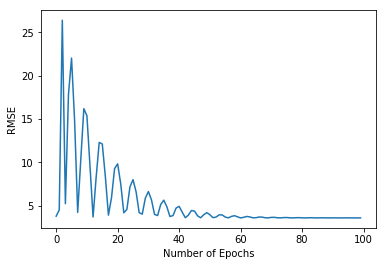

In [76]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

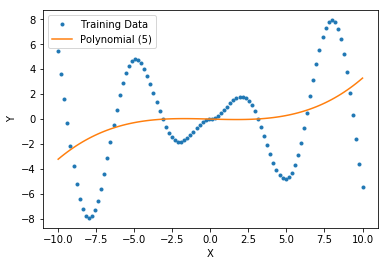

In [77]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Air Quality Data

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  When done correctly, `X` and `T` should both have shape `(827, 1)`.  Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.

Now apply the Adam optimization function to fit a polynomial to this data.  Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.

X.shape = (827, 1) Xnames = ['Hour']
T.shape = (827, 1) Tnames = ['CO']


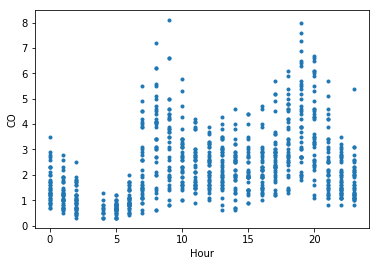

In [100]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.shape

hour = [int(t[:2]) for t in data['Time']]
CO = data['CO(GT)']
CO[:10]

T = CO
T = np.array(T).reshape((-1, 1))  # make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO']
X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

plt.plot(X, T, '.')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]);

In [107]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

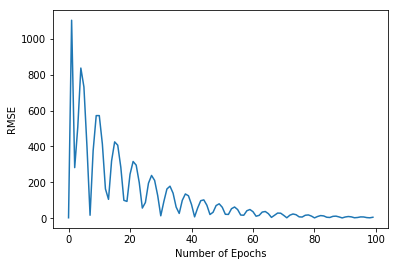

In [108]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

The RMSE graph for the `Air Quality` dataset shows a clear osciallation as the number of epochs increases, with the amplitude of each iteration slowly getting smaller. Around 80 or so epochs, it appears as if the RMSE is not being signficantly affected by further gradient calculations. However, further analysis below shows otherwise.

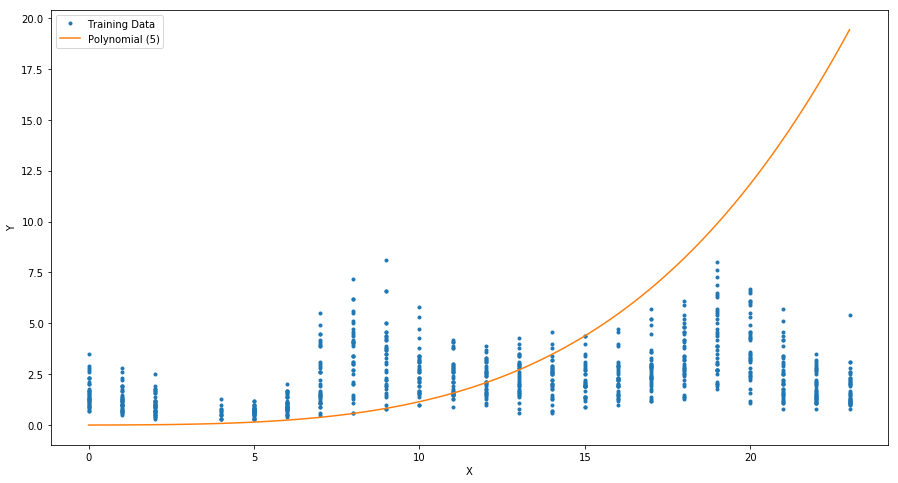

In [112]:
plt.figure(figsize=(15,8))

X_plot=np.linspace(0,23,100).reshape(-1,1)

plt.plot(X, T, '.', label='Training Data')
plt.plot(X_plot, polynomial_model(X_plot, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

The polynomial manages to almost 'bisect' the `CO2` data when `n_steps = 100`. Unfortunately the top end of the polynomial function grows far too quickly. Visually speaking (and by total error), the polynomial model with the given parameters is a poor choice if attempting to predict `CO2` given hour.

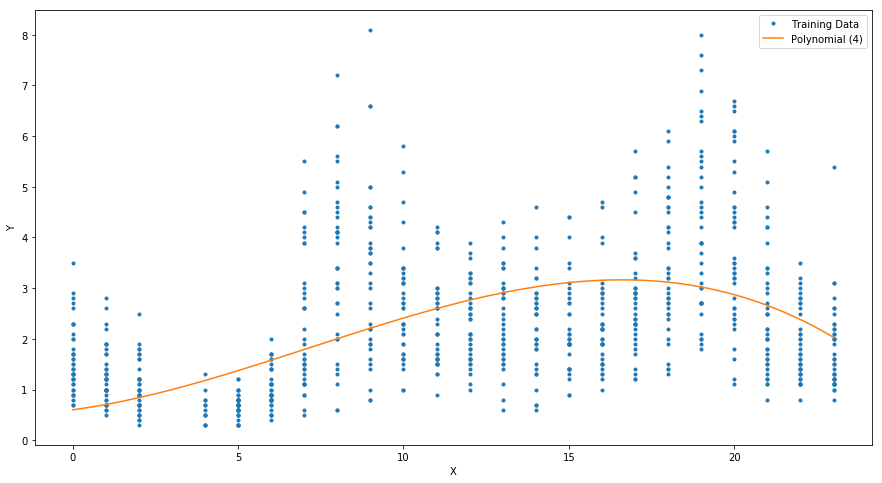

In [116]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 1000  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

plt.figure(figsize=(15,8))

X_plot=np.linspace(0,23,100).reshape(-1,1)

plt.plot(X, T, '.', label='Training Data')
plt.plot(X_plot, polynomial_model(X_plot, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Increasing the `n_steps` to 1000 and reducing `n_powers` to 4 results in the above curve as it relates to the `CO2` data. While this curve visually appears to capture more data than the inital parameters (`n_powers = 5, n_steps = 100`) it still isn't a reliable fit. Increasing `n_steps` by an order of magnitude drastically increases compute time from almost instant to a noticeable delay. The above graph also has an inflection point present within the dataset range.

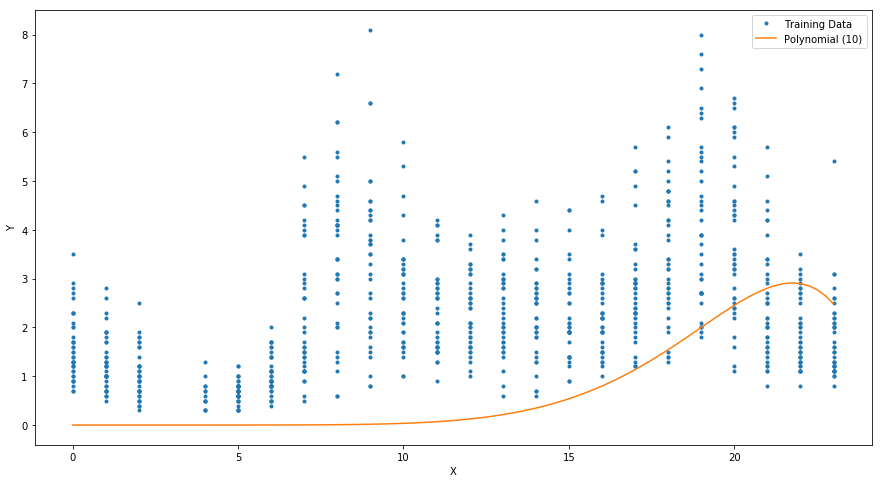

In [117]:
n_powers = 10
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 500  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

plt.figure(figsize=(15,8))

X_plot=np.linspace(0,23,100).reshape(-1,1)

plt.plot(X, T, '.', label='Training Data')
plt.plot(X_plot, polynomial_model(X_plot, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Increasing `n_powers` to 10 and reducing `n_steps` to 500 from the previous model results in the above curve as it relates to the `CO2` data. Visually it appears to have mirrored properties from the first model where `n_powers = 5` as the front end of the day cycle is almost entirely missed but the end is somewhat captured. An inflection point is also present within this graph.

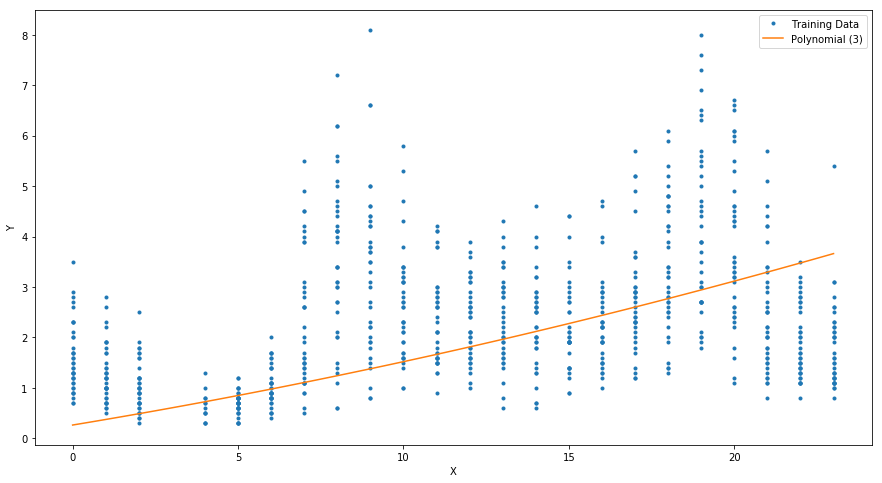

In [129]:
n_powers = 3
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 40  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

plt.figure(figsize=(15,8))

X_plot=np.linspace(0,23,100).reshape(-1,1)

plt.plot(X, T, '.', label='Training Data')
plt.plot(X_plot, polynomial_model(X_plot, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Decreasing `n_powers` to 3 and `n_steps` to 40 results in the above curve as it relates to the `CO2` data.It should be noted that unlike the previous two models which had larger values for `n_steps`, this model has a concave-up curvature in dataset range (kept constant for all models). The slope of this model is nearly linear likely due to the combination of smaller values present in `n_powers`.

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [130]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Ridgeway-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 1))
   